
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [42]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0.0,
    ),
]

In [43]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

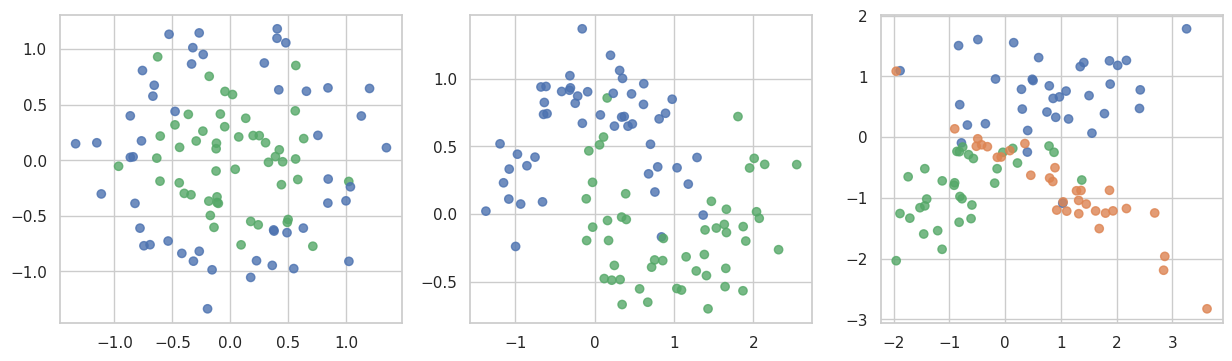

In [44]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [45]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

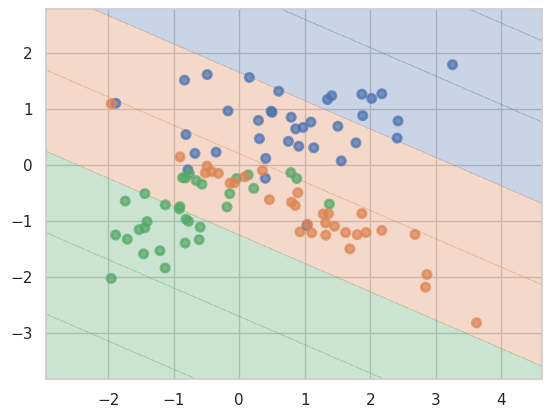

In [46]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Training Accuracy: 1.0
Test Accuracy: 0.65


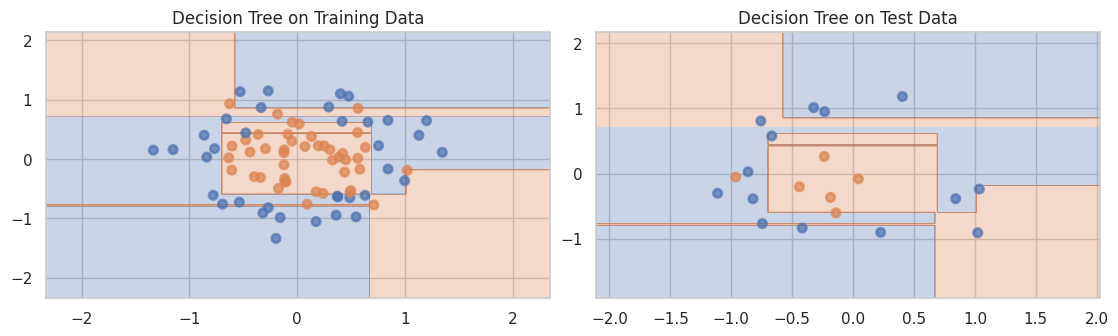

In [47]:
from sklearn.metrics import accuracy_score

X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_surface(clf, X_train, y_train)
plt.title('Decision Tree on Training Data')
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f'Training Accuracy: {train_acc}')

plt.subplot(1, 2, 2)
plot_surface(clf, X_test, y_test)
plt.title('Decision Tree on Test Data')
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f'Test Accuracy: {test_acc}')

Training Accuracy: 1.0
Test Accuracy: 0.95


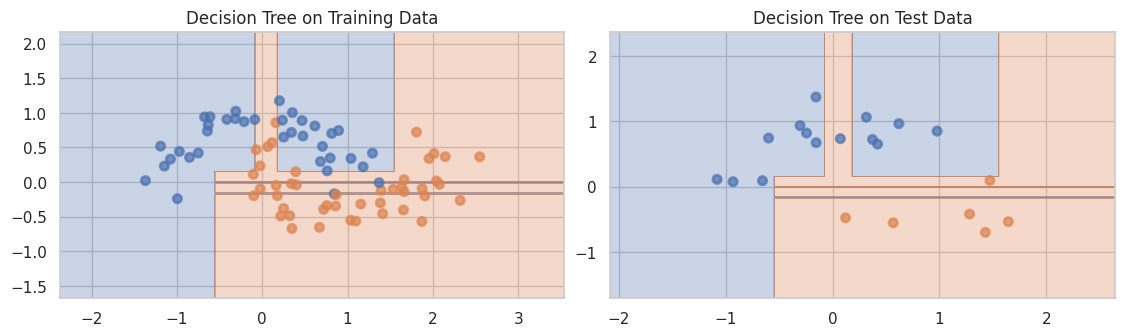

In [48]:
from sklearn.metrics import accuracy_score

X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_surface(clf, X_train, y_train)
plt.title('Decision Tree on Training Data')
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f'Training Accuracy: {train_acc}')

plt.subplot(1, 2, 2)
plot_surface(clf, X_test, y_test)
plt.title('Decision Tree on Test Data')
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f'Test Accuracy: {test_acc}')

Training Accuracy: 1.0
Test Accuracy: 0.7


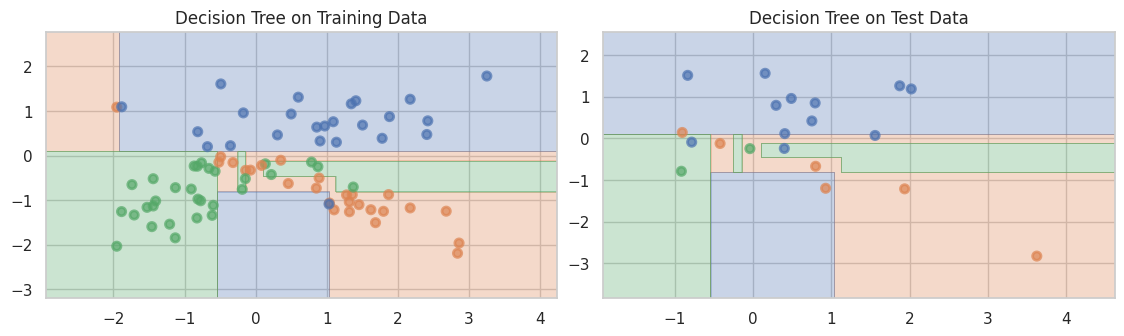

In [49]:
from sklearn.metrics import accuracy_score

X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_surface(clf, X_train, y_train)
plt.title('Decision Tree on Training Data')
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f'Training Accuracy: {train_acc}')

plt.subplot(1, 2, 2)
plot_surface(clf, X_test, y_test)
plt.title('Decision Tree on Test Data')
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f'Test Accuracy: {test_acc}')

__Ответ:__ Модели [0] и [2] переобучились сильно, модель [0] неправильно классифицирует 35%  данных в тестовой выборке, а модель [2] неправильно классифицирует 30%  данных.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth: 2
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 0.8125
test accuracy: 0.6 

num of dataset: 2
train accuracy: 0.9125
test accuracy: 1.0 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.75 



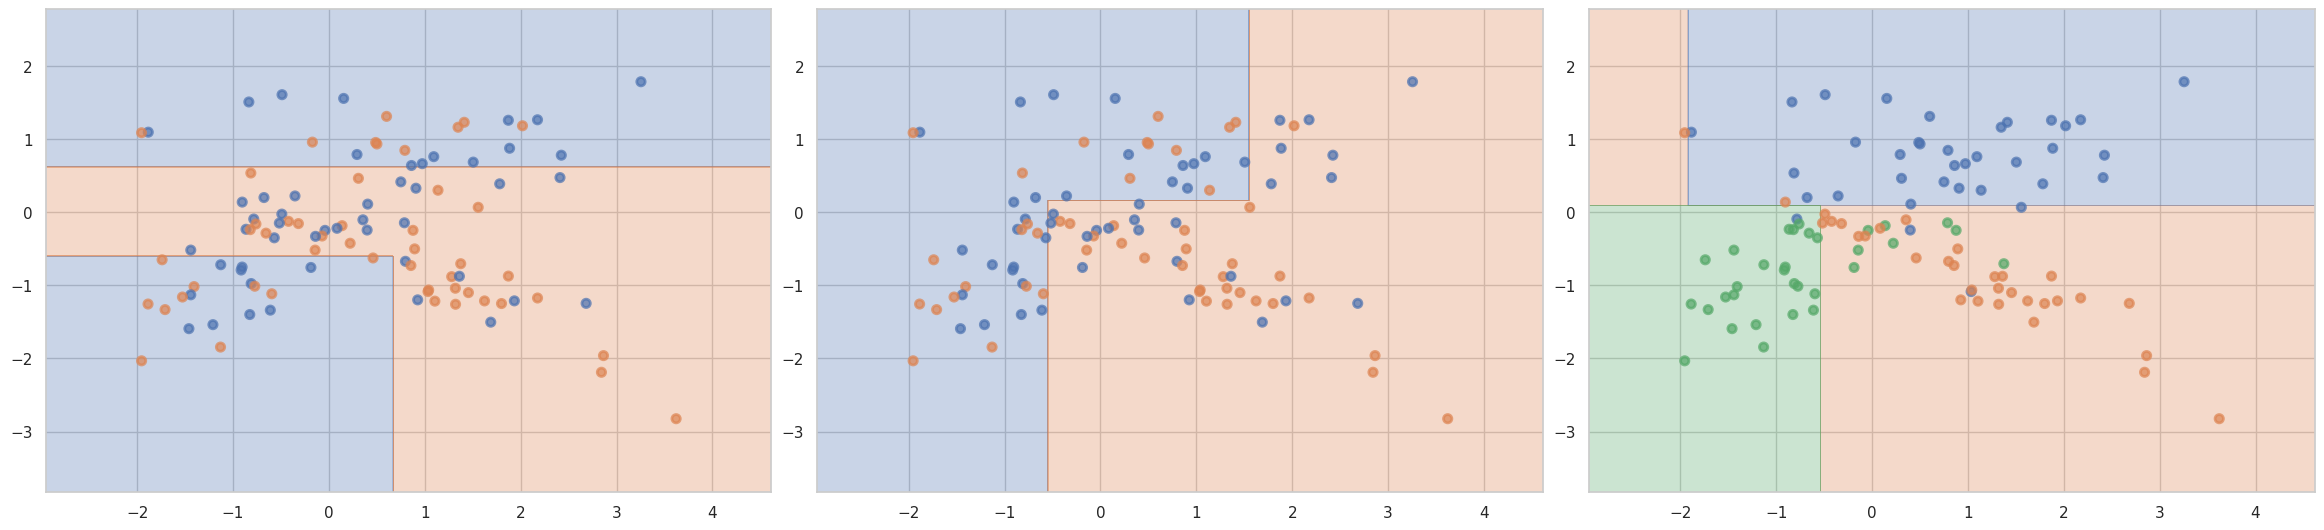

max_depth: 2
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.8
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.8875
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



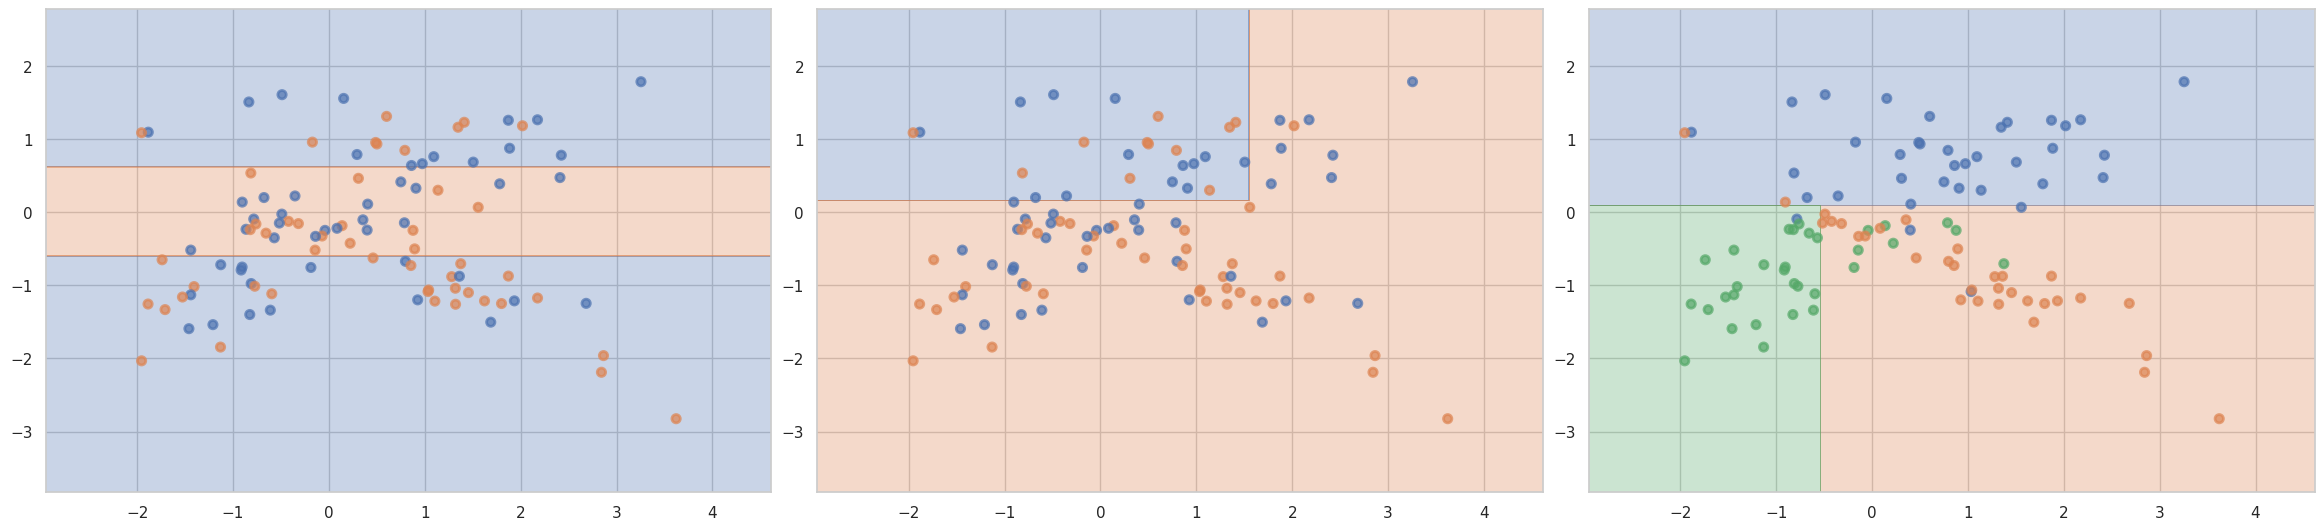

max_depth: 2
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.8
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



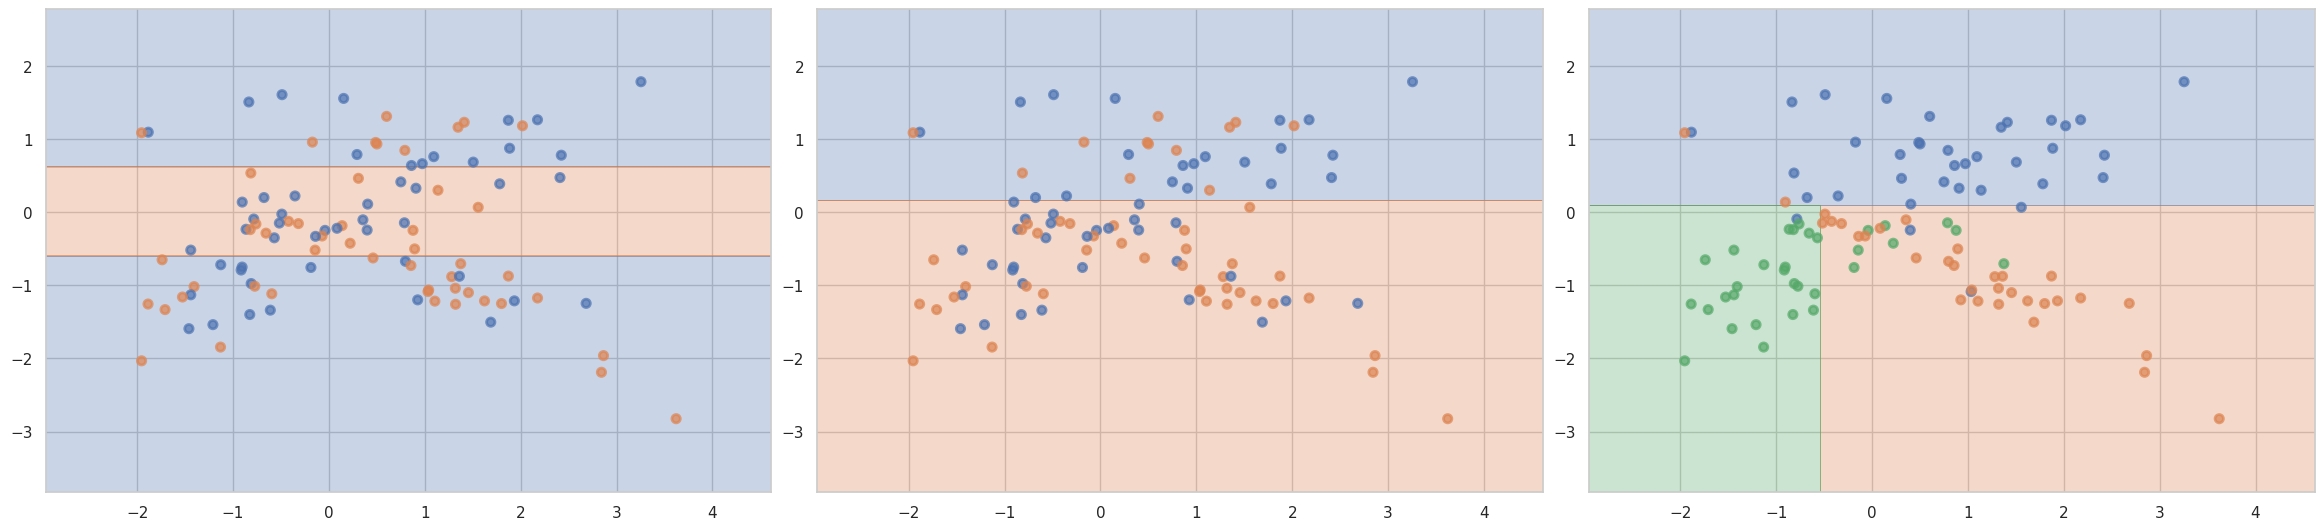

max_depth: 2
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



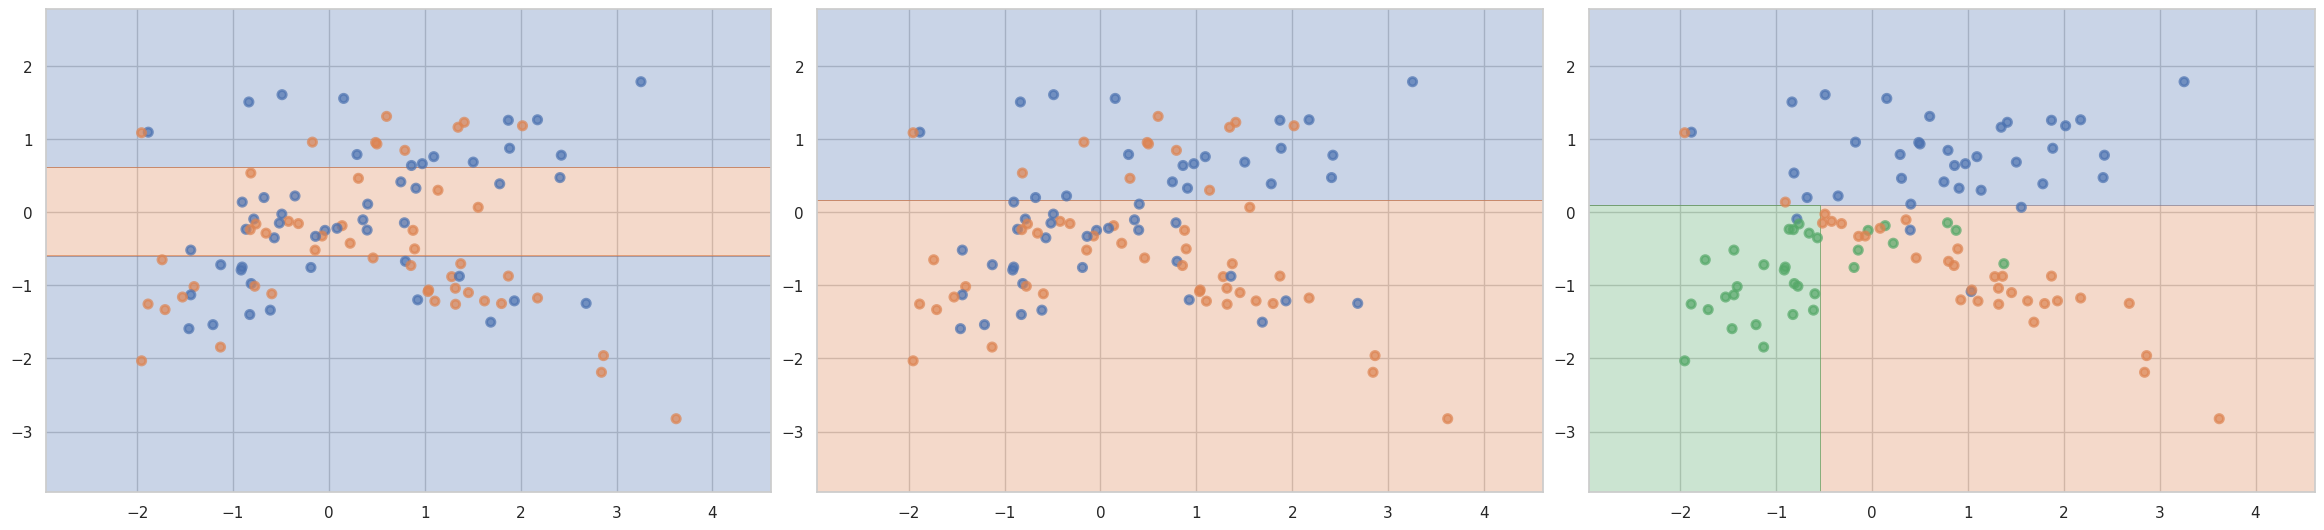

max_depth: 4
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 0.9625
test accuracy: 0.75 

num of dataset: 2
train accuracy: 0.9875
test accuracy: 0.95 

num of dataset: 3
train accuracy: 0.9125
test accuracy: 0.7 



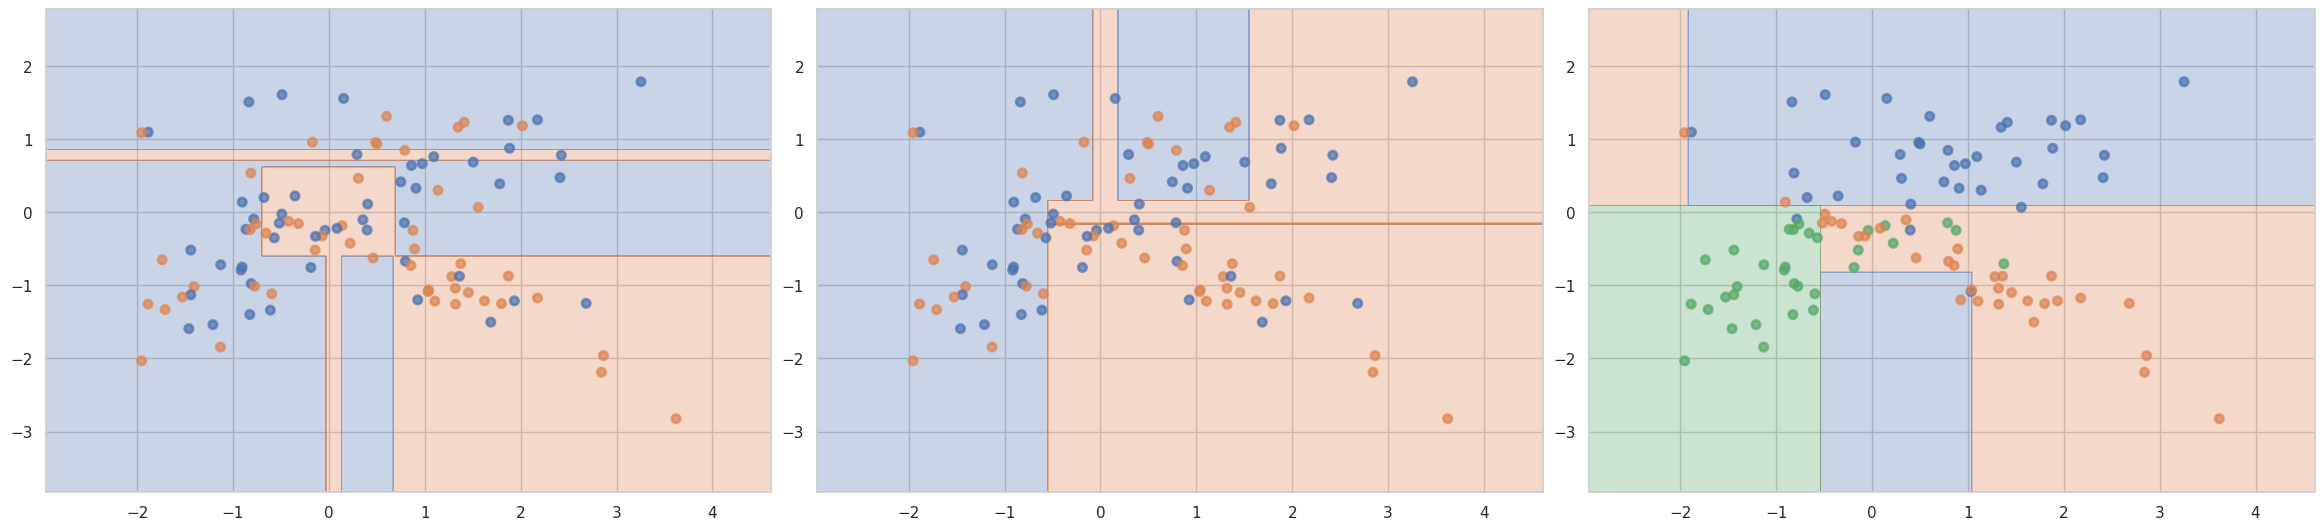

max_depth: 4
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



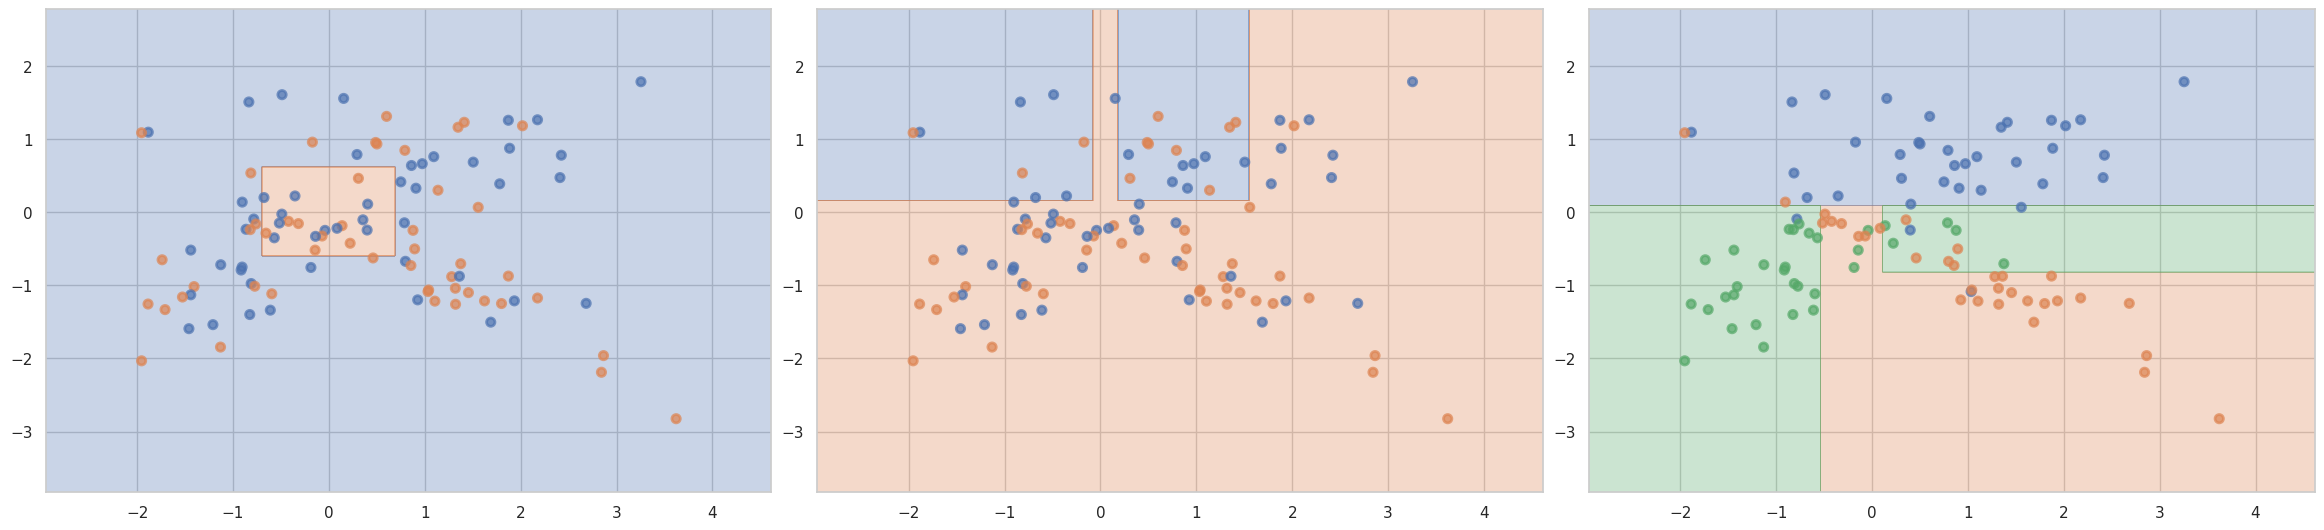

max_depth: 4
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



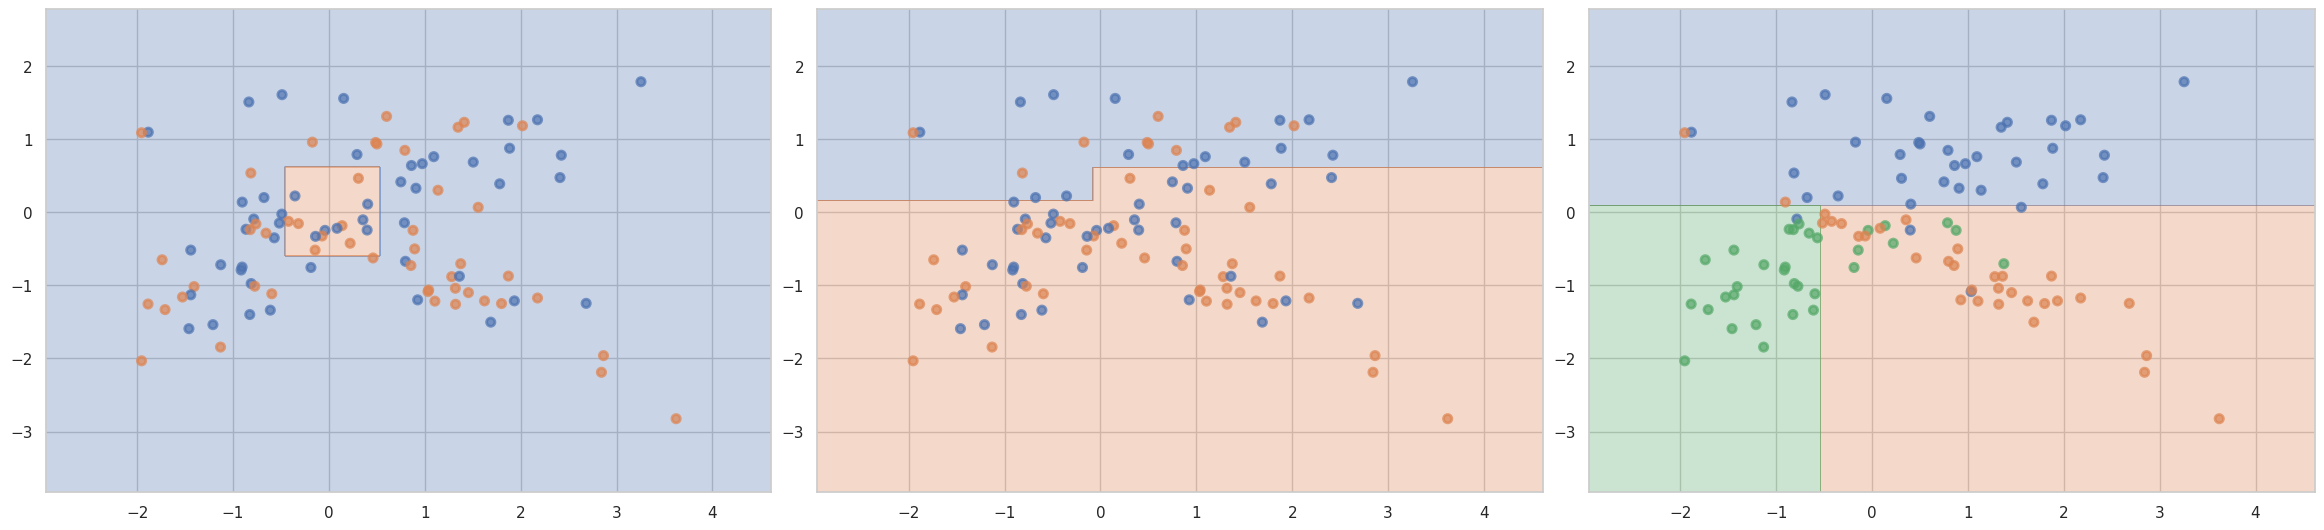

max_depth: 4
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



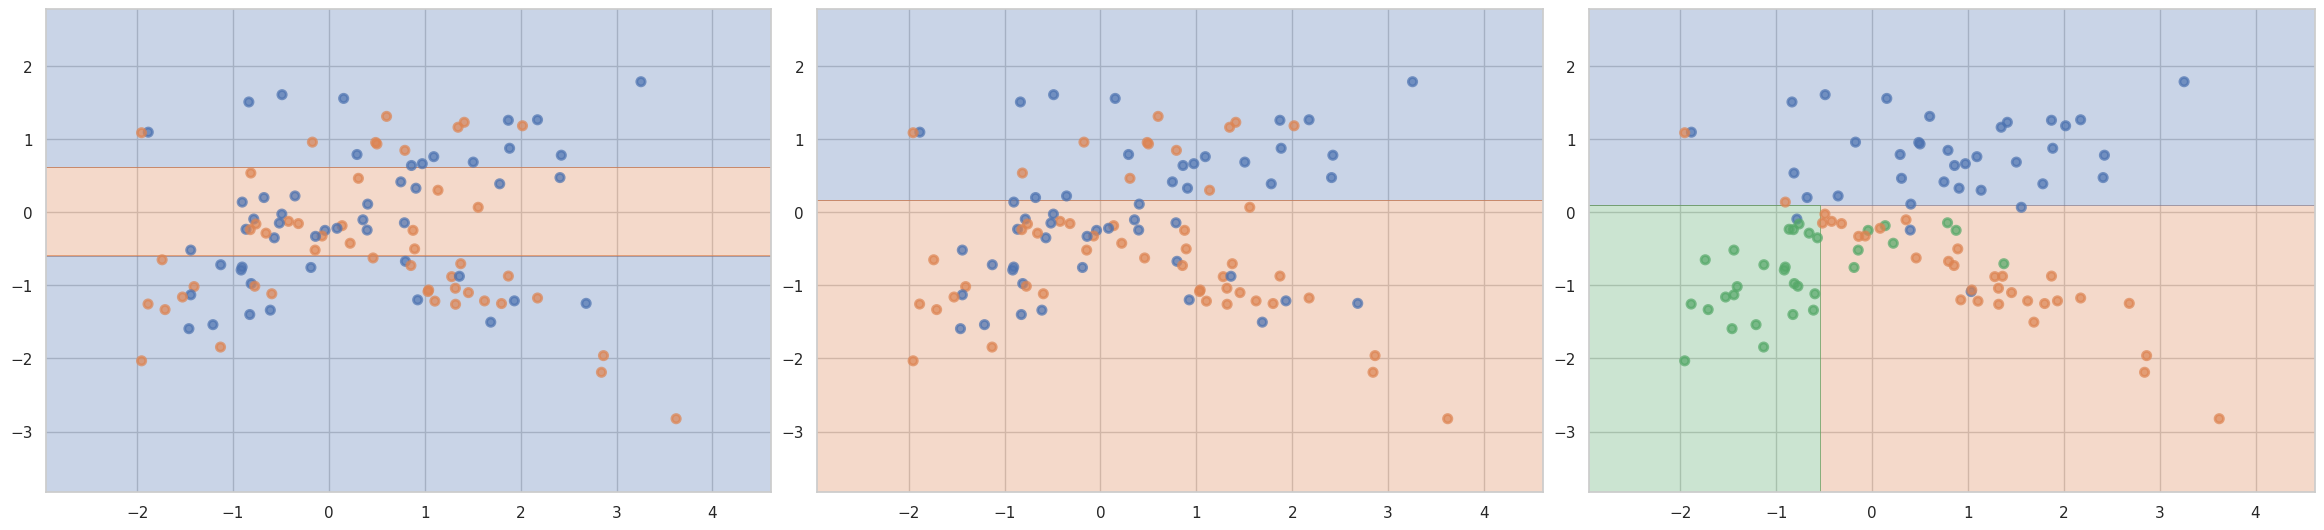

max_depth: 6
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.7 

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.95 

num of dataset: 3
train accuracy: 0.95
test accuracy: 0.65 



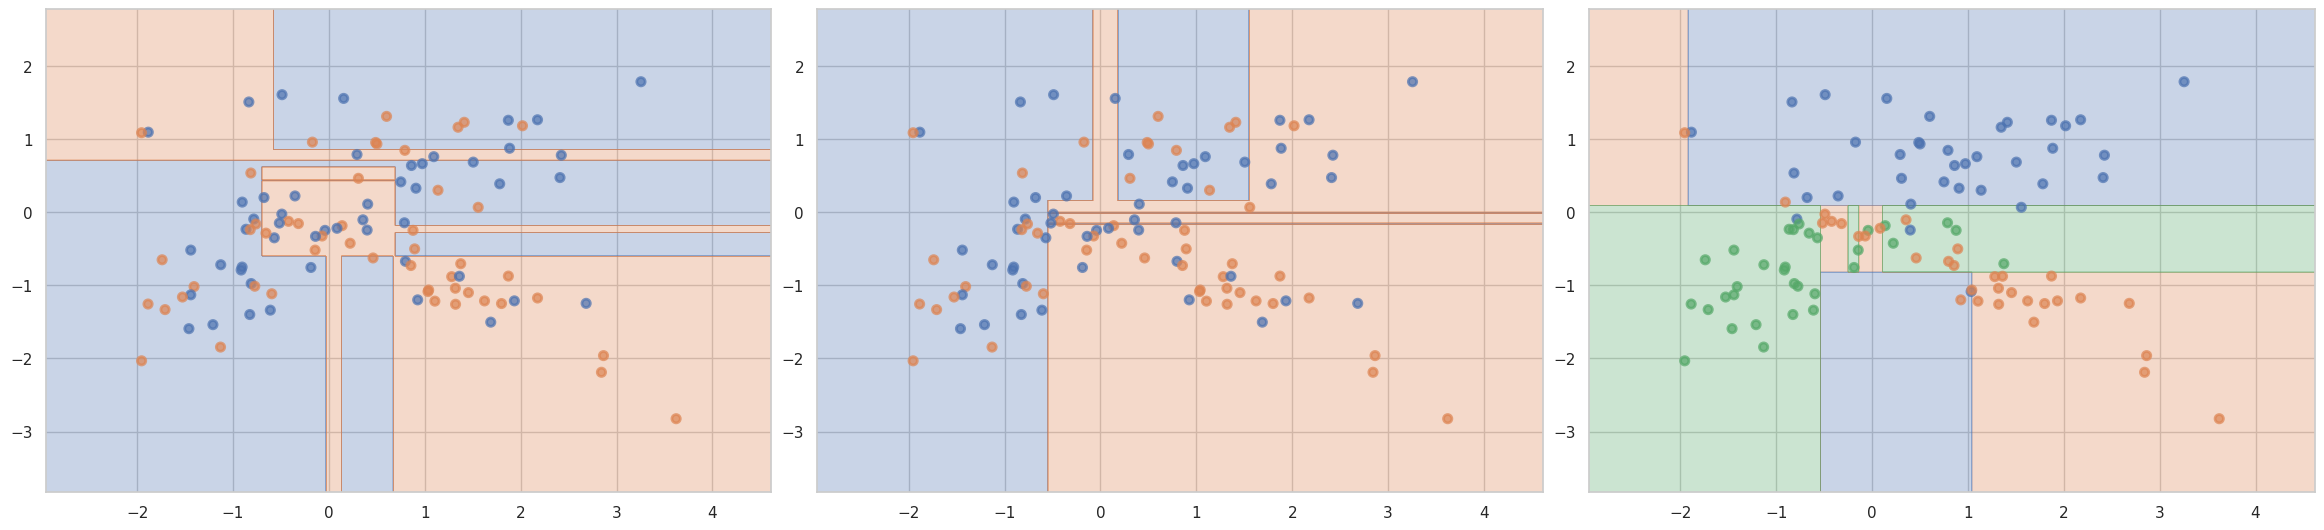

max_depth: 6
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



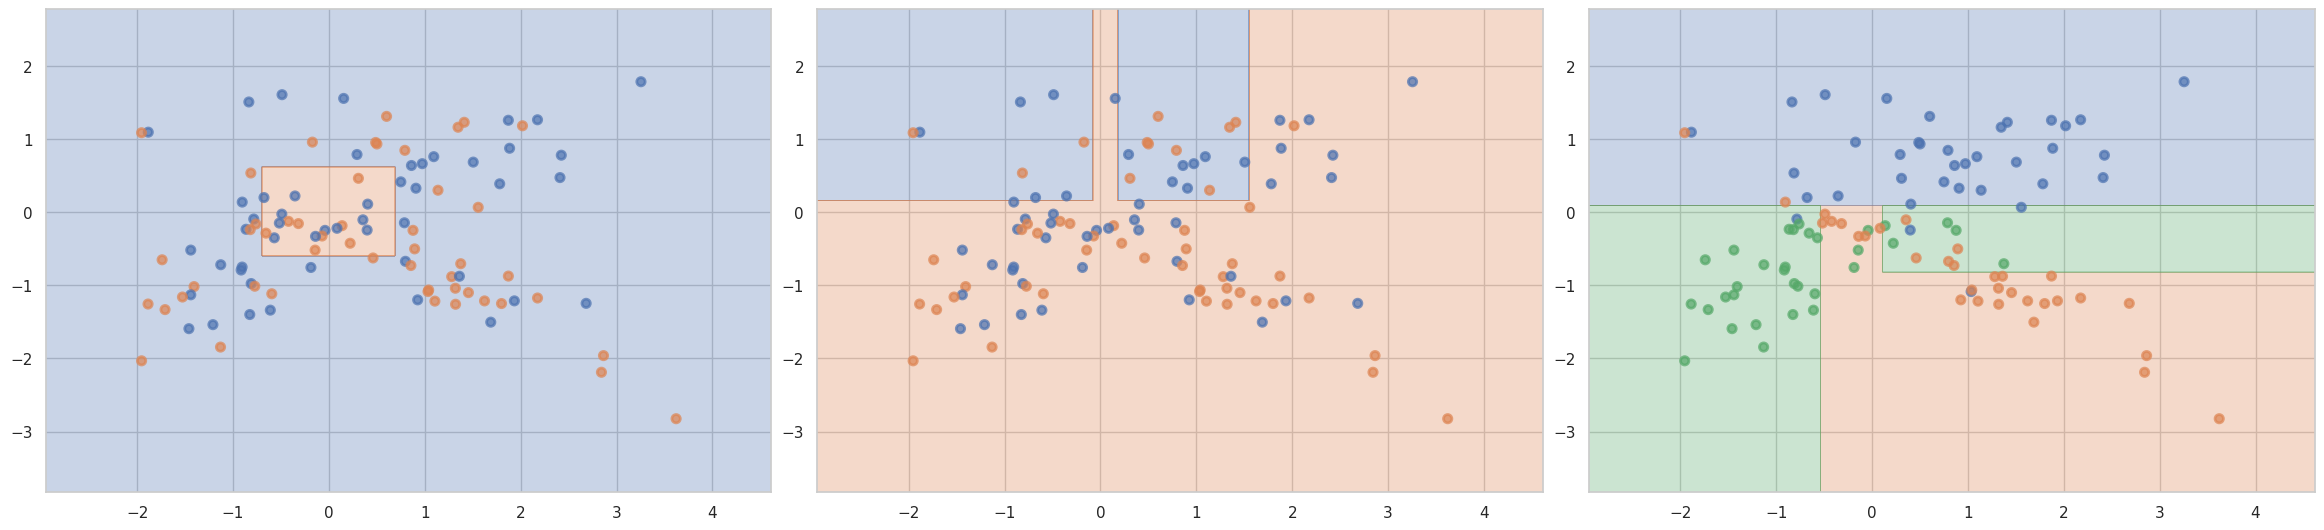

max_depth: 6
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



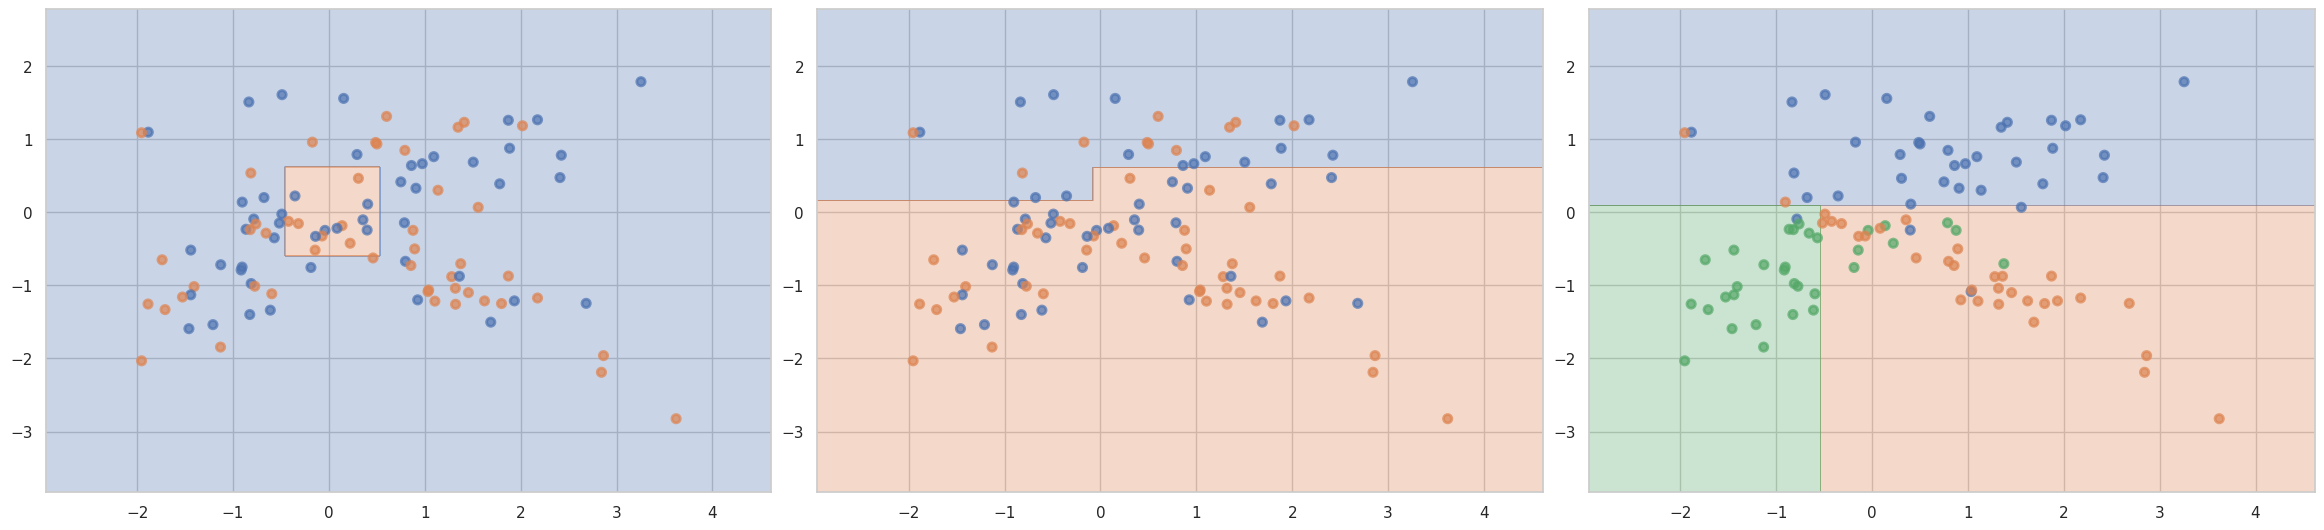

max_depth: 6
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



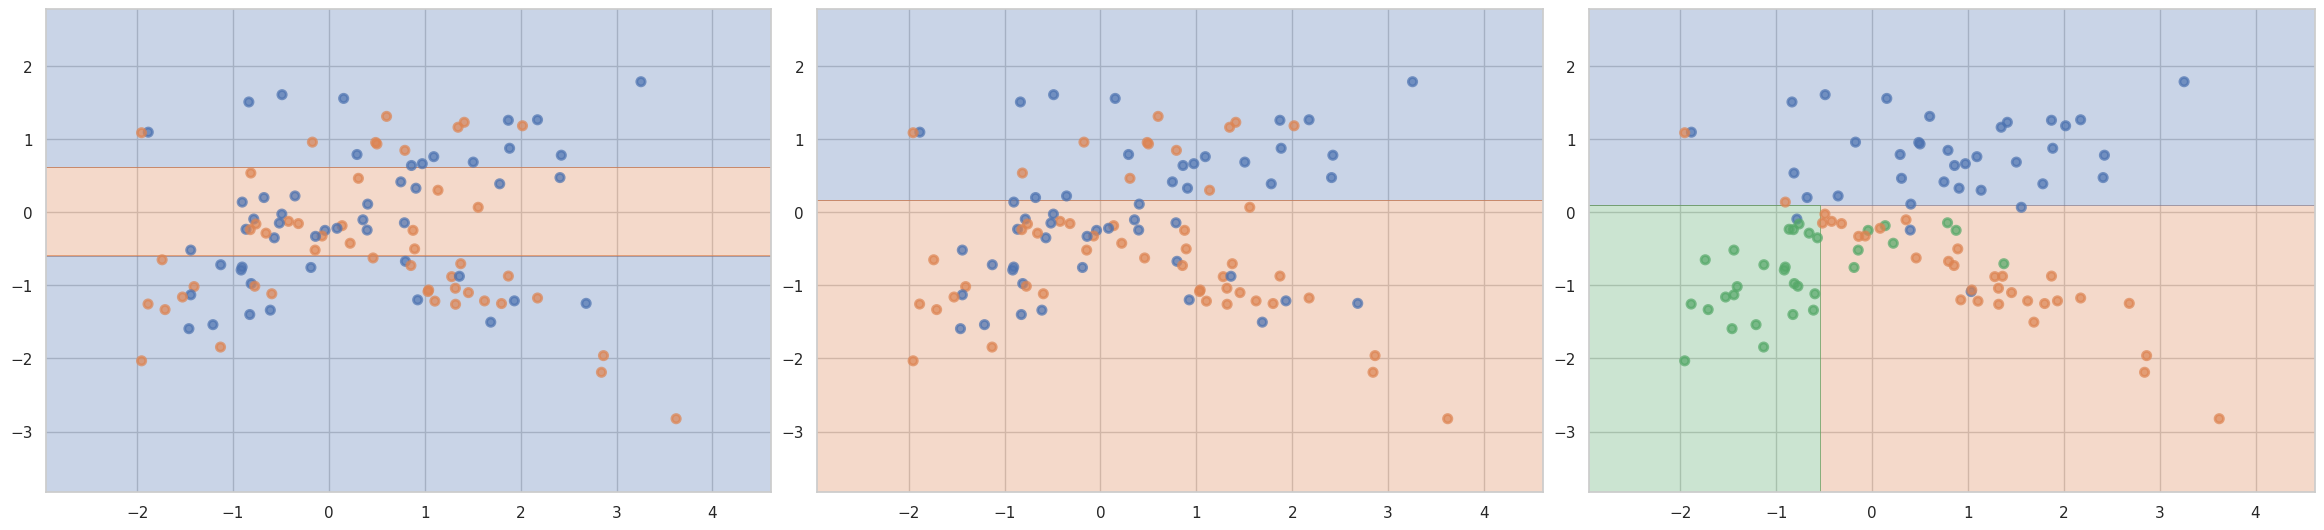

max_depth: 8
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.75 

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.95 

num of dataset: 3
train accuracy: 1.0
test accuracy: 0.7 



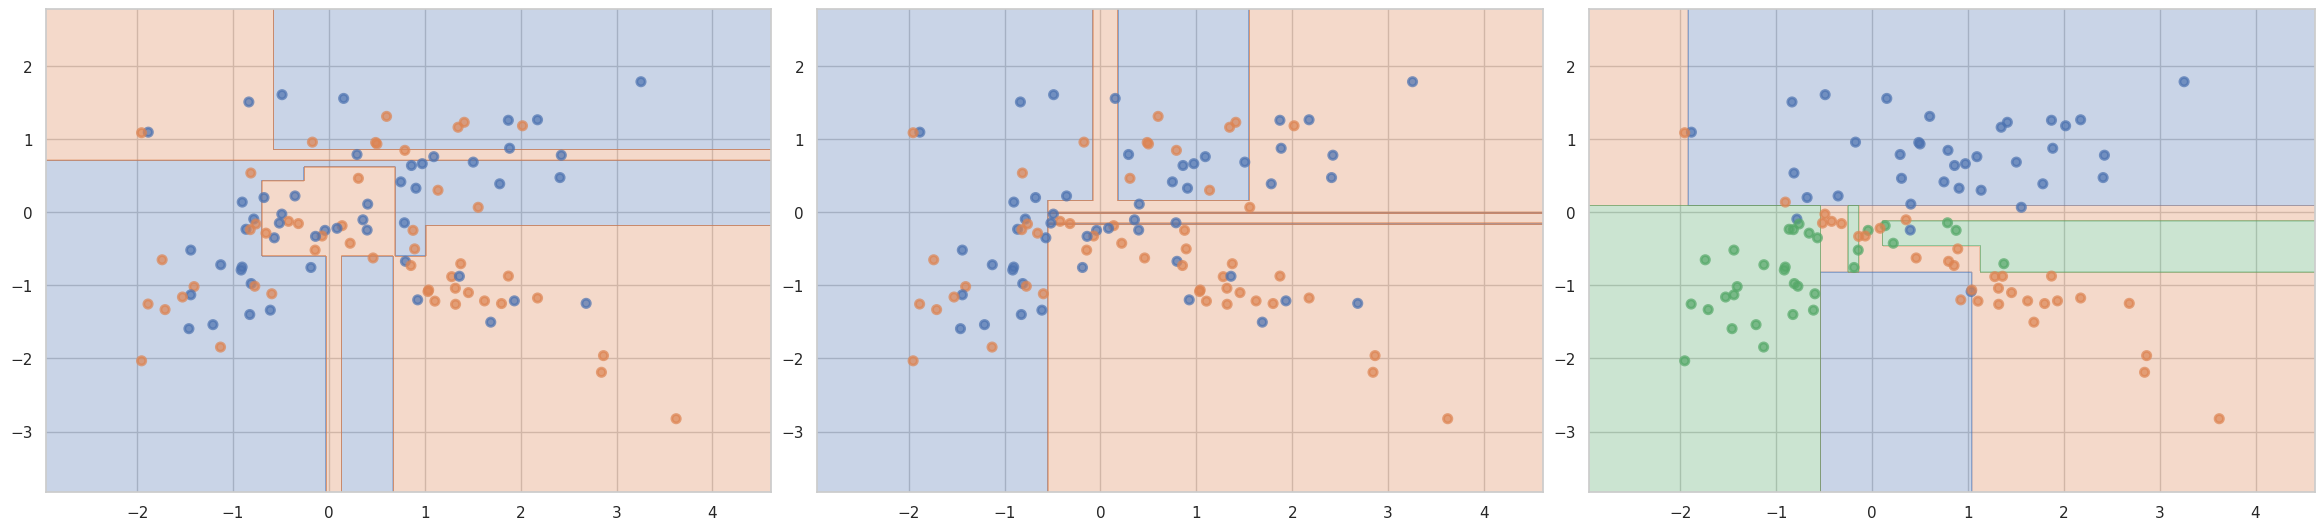

max_depth: 8
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



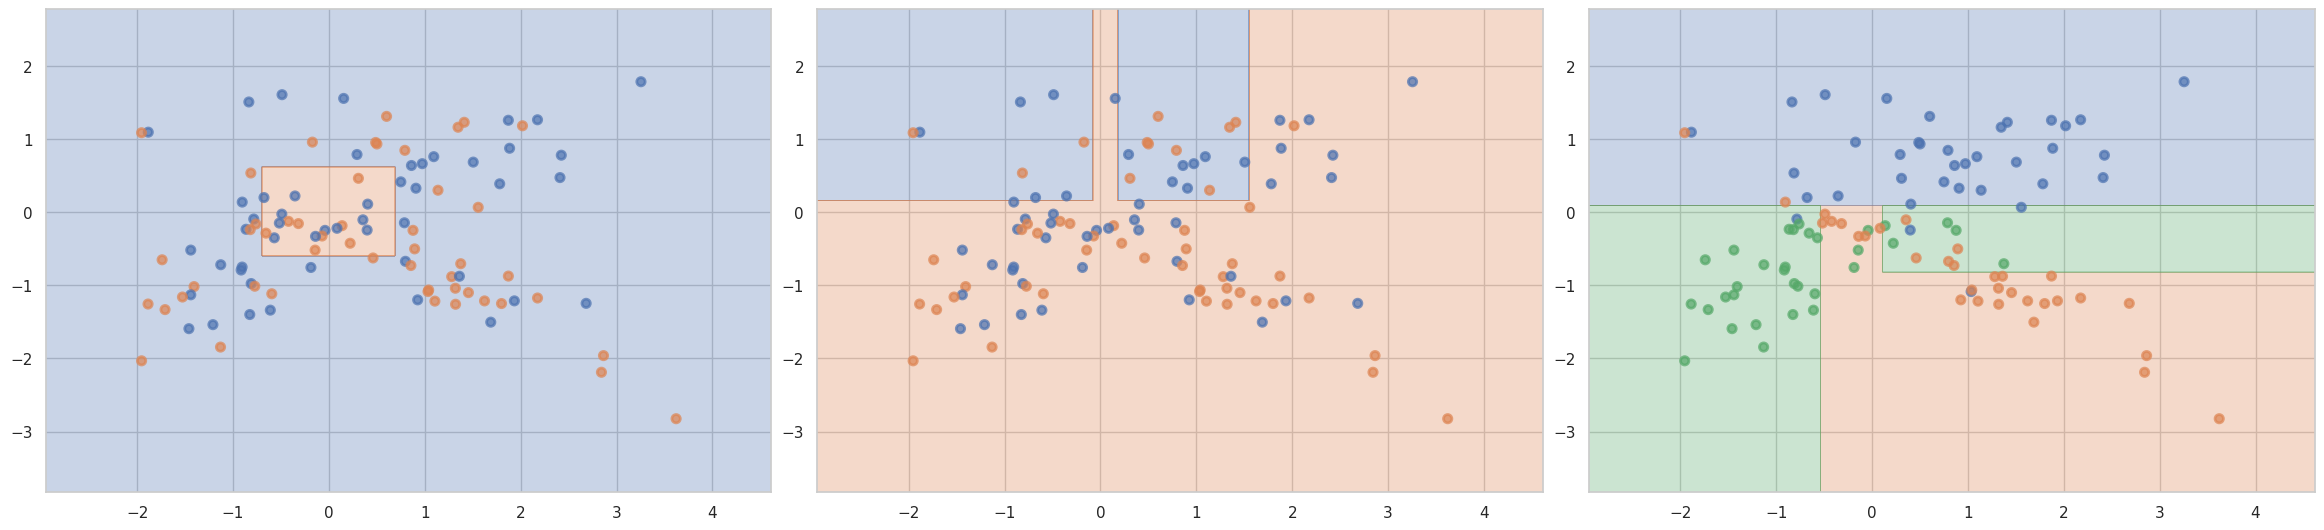

max_depth: 8
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



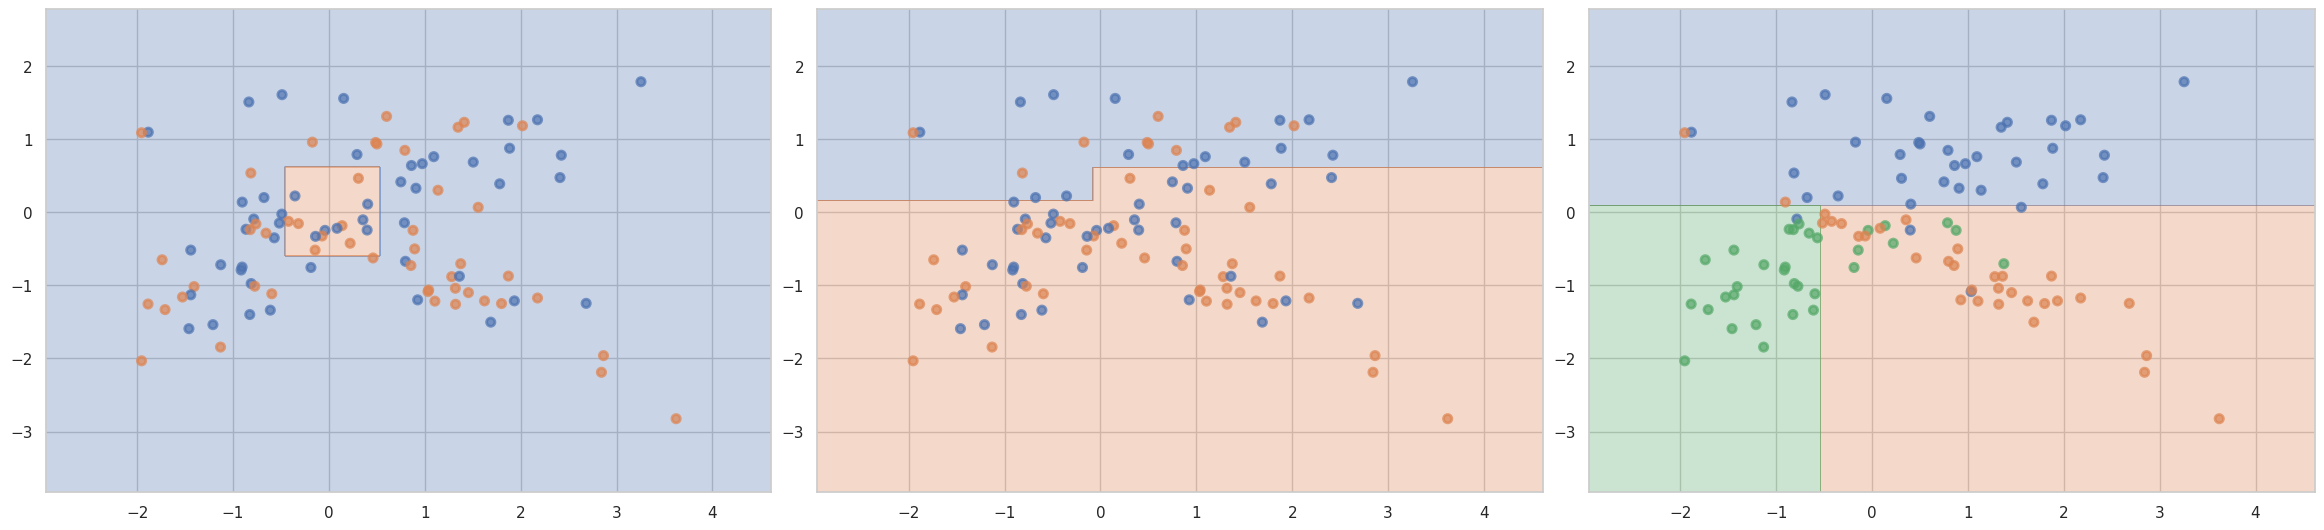

max_depth: 8
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



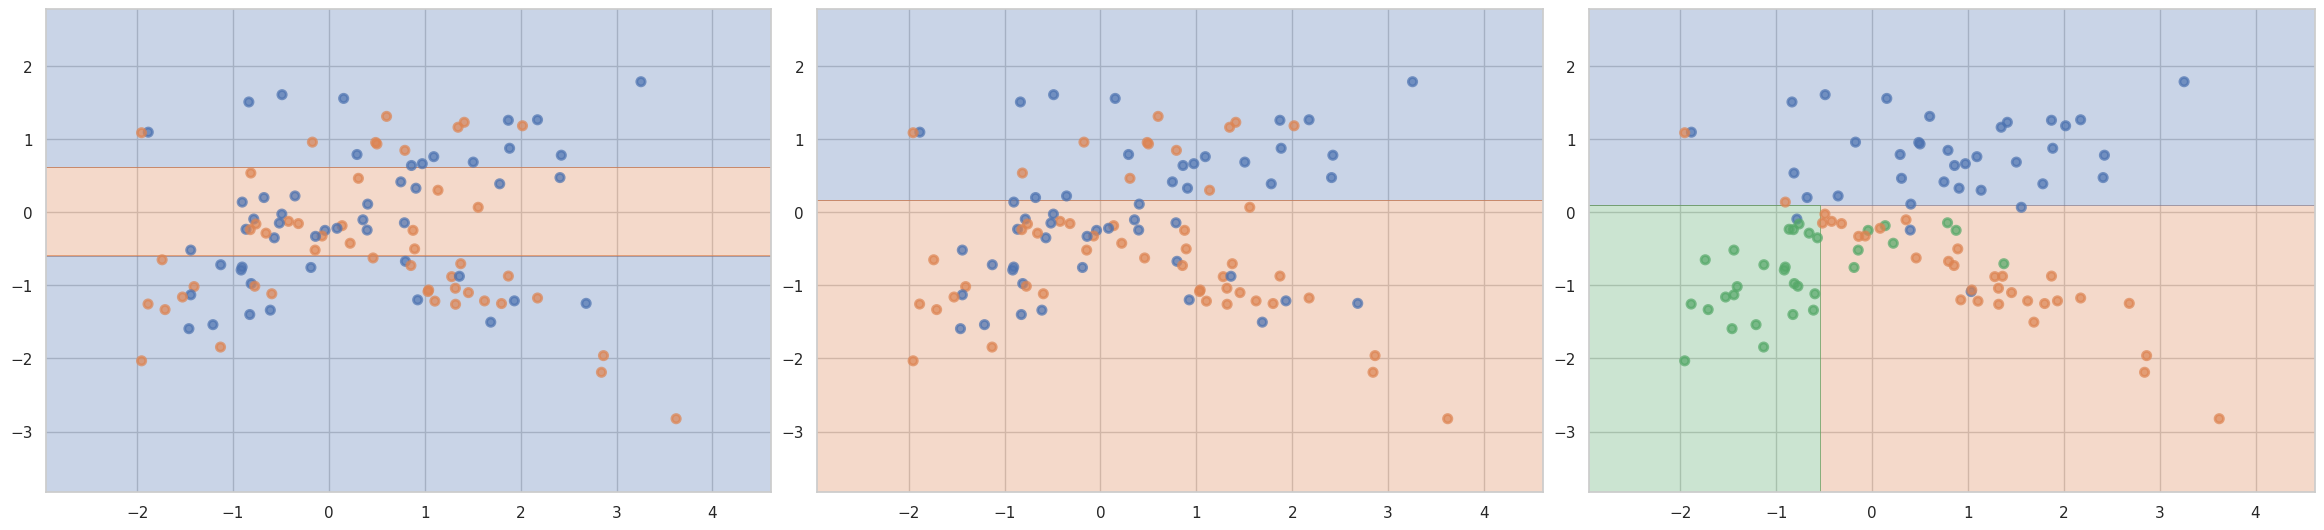

In [54]:
dephs_ = [2, 4, 6, 8]
sl_ = [1, 5, 10, 15]
for j, max_depth_now in enumerate(dephs_):
    for k, min_samples_leaf_now in enumerate(sl_):
        plt.figure(figsize=(24, 6))
        print('max_depth:', max_depth_now)
        print('min_samples_leaf:', min_samples_leaf_now, '\n')
        for i, (x, y) in enumerate(datasets):
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
            tr  = DecisionTreeClassifier(max_depth=max_depth_now, min_samples_leaf=min_samples_leaf_now).fit(X_train, y_train)
            plt.subplot(1, 3, i + 1)
            plot_surface(tr, X, y)

            print('num of dataset:', i + 1)
            print('train accuracy:', accuracy_score(y_train, tr.predict(X_train)))
            print('test accuracy:', accuracy_score(y_test, tr.predict(X_test)), '\n')
        plt.show()

__Ответ:__
1. min_samples_leaf:
Параметр min_samples_leaf задает минимальное количество объектов, которые должны находиться в каждом листе решающего дерева.
Переобучение: Когда min_samples_leaf маленький, модель может создавать листья с очень небольшим количеством объектов. Это позволяет ей очень точно подстроиться под обучающие данные, вплоть до запоминания шума и выбросов.
Последствия: Модель будет иметь высокую точность на обучающей выборке, но ее точность на тестовой выборке будет значительно ниже. Это говорит о том, что модель плохо обобщается на новые данные.
2. max_depth:
Параметр max_depth определяет максимальную глубину дерева, то есть количество уровней разбиения данных.
Переобучение: С увеличением глубины дерева, оно может становится более сложным и “густым”. Это позволяет ему подстроиться под обучающие данные, но также увеличивает риск запоминания шума и выбросов.
Последствия: Модель может иметь высокую точность на обучающей выборке, но плохую точность на тестовой выборке, что снова указывает на переобучение.

  Уменьшение параметра min_samples_leaf и увеличение параметра max_depth приводит к переобучению модели на всех 3-х датасетах.
3. Как бороться с переобучением:
Увеличить min_samples_leaf: Это позволит создавать листья с большим количеством объектов, что сделает модель менее склонной к переобучению.
Уменьшить max_depth: Это ограничит сложность дерева, предотвращая его глубокое погружение в обучающие данные.
Использовать кросс-валидацию: Это поможет определить оптимальные значения гиперпараметров, которые обеспечивают наилучшую обобщающую способность модели.
Регуляризация: В некоторых случаях можно использовать методы регуляризации, например, L1 или L2 регуляризацию, для ограничения сложности модели и уменьшения переобучения.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [77]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """


    # Заметки : пороги меньше min(feature) и больше max(feature) не рассматриваются
    pairs = np.array(sorted(zip(feature_vector, target_vector)))
    feature_vector = pairs[:, 0]
    target_vector = pairs[:, 1]
    k = target_vector.shape[0]

    feature_vector, index = np.unique(feature_vector, return_index=True)
    n = feature_vector.shape[0]
    index = index[1:n] - 1
    pref = np.cumsum(target_vector)

    thresholds = (feature_vector[: n - 1] + feature_vector[1 : n + 1]) / 2
    positive = pref[k - 1]
    R_l = index + 1
    R_r = k - R_l
    c1_l = pref[index]
    c1_r = positive - c1_l
    c0_l = R_l - c1_l
    c0_r = R_r - c1_r
    ginis = (((c0_l * c0_l + c1_l * c1_l) / R_l + (c0_r * c0_r + c1_r * c1_r) / R_r) / k) - 1

    best = np.argmax(ginis)

    return thresholds, ginis, thresholds[best], ginis[best]

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Загрузить данные
df = pd.read_csv('students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


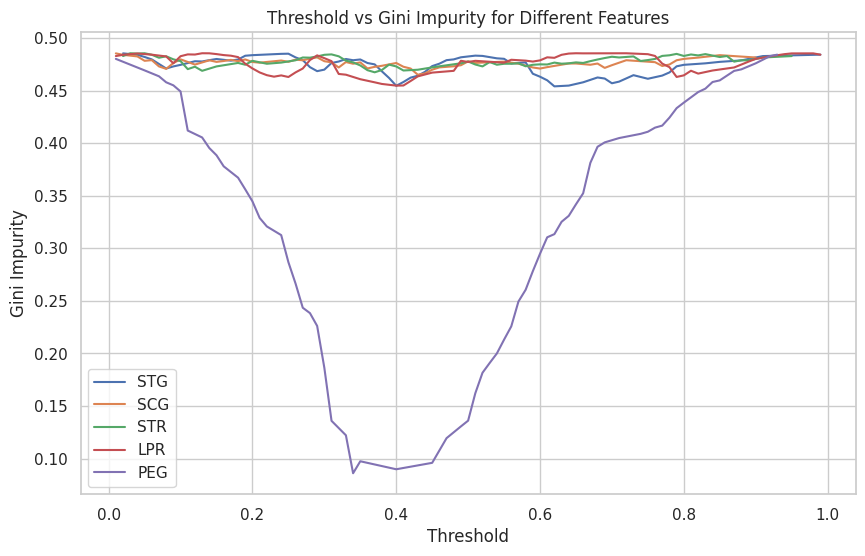

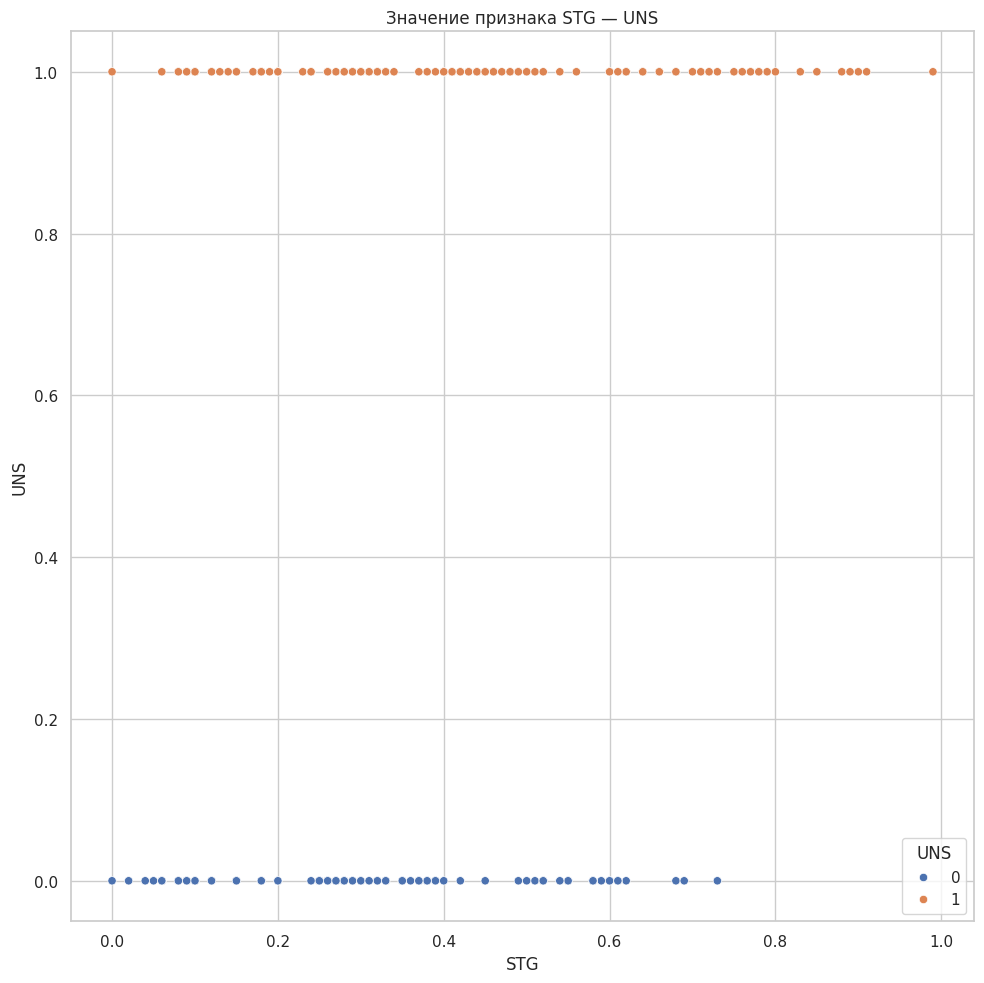

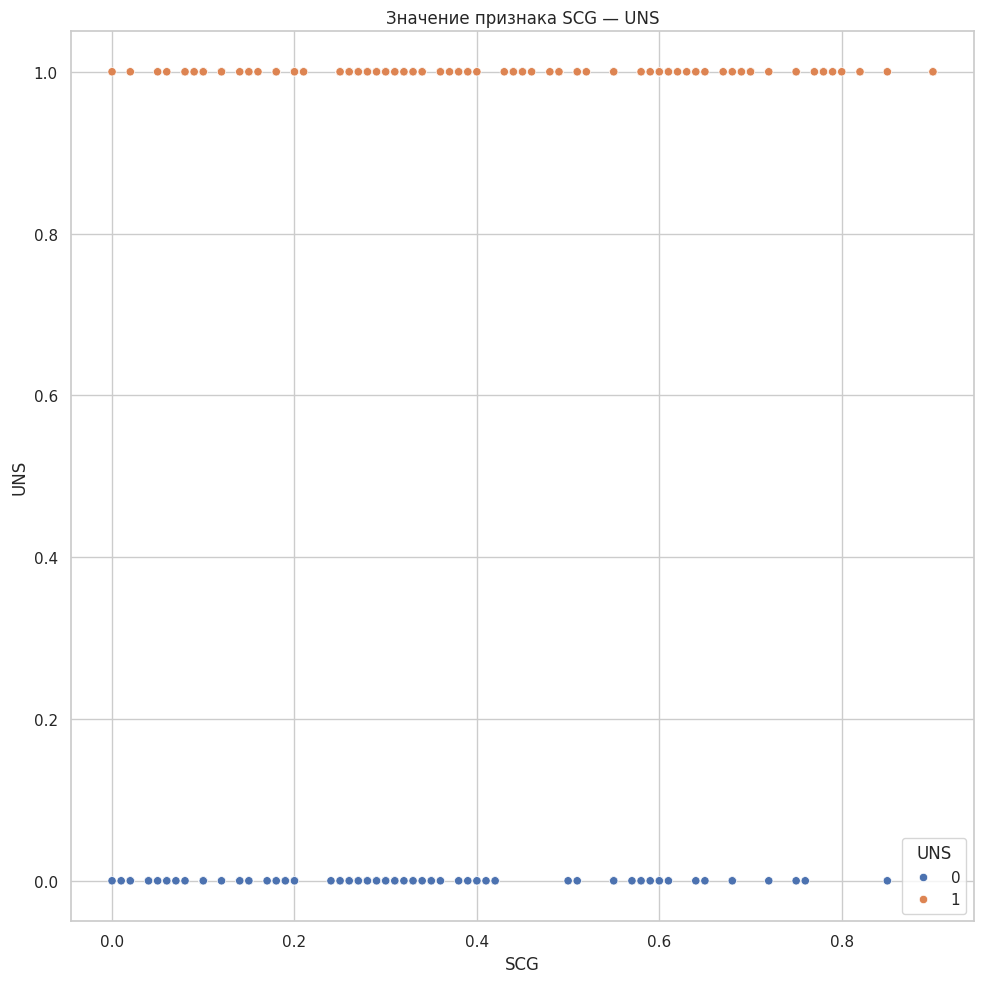

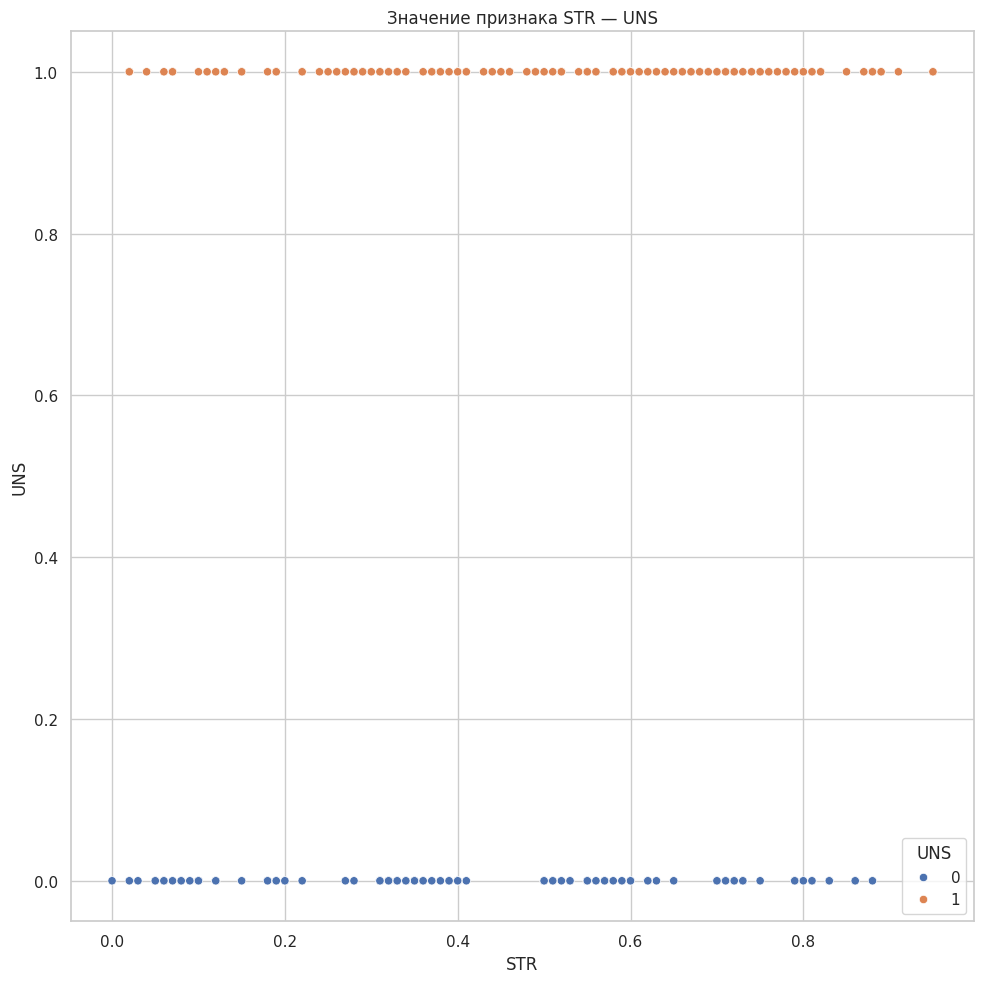

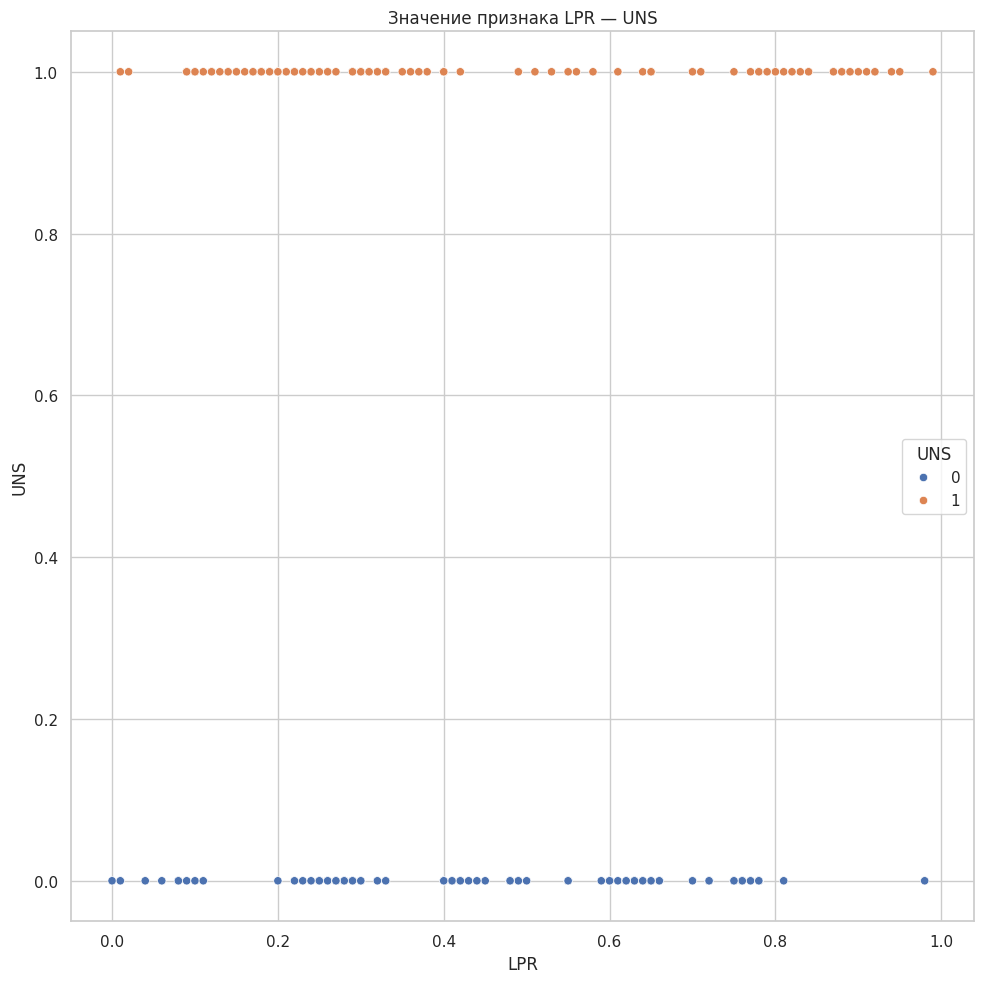

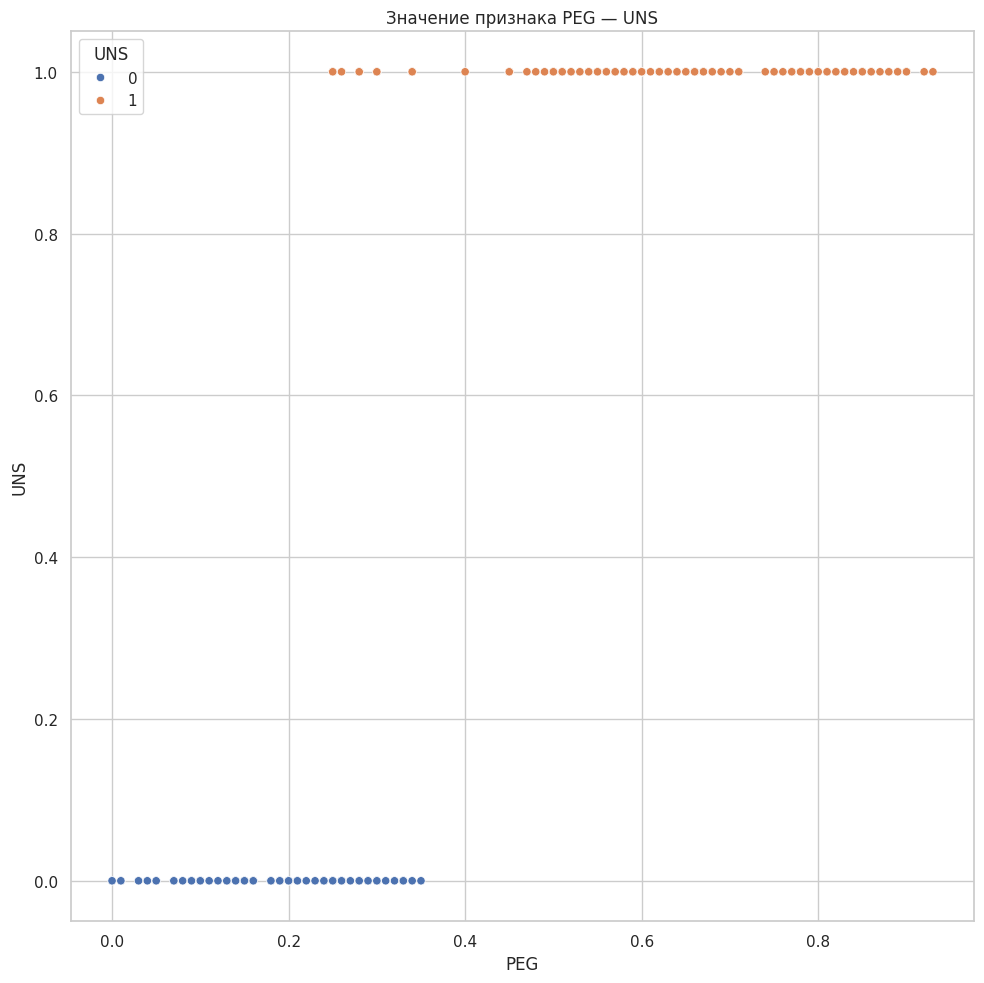

In [83]:
def entropy(y):
    """
    Вычисляет энтропию целевой переменной.

    Parameters:
    y: Вектор целевых переменных.

    Returns:
    Энтропия.
    """

    # Вычислить распределение целевых переменных
    p = np.bincount(y) / len(y)

    # Вычислить энтропию
    entropy = -np.sum(p * np.log2(p))

    return entropy


plt.figure(figsize=(10, 6))

for i in range(5):
    feature_name = df.columns[i]
    feature_values = sorted(df[feature_name])

    gini_values = []

    for value in feature_values:
        left = df[df[feature_name] < value]
        right = df[df[feature_name] >= value]

        gini_left = 1 - (left.iloc[:, -1].mean() ** 2 + (1 - left.iloc[:, -1].mean()) ** 2)
        gini_right = 1 - (right.iloc[:, -1].mean() ** 2 + (1 - right.iloc[:, -1].mean()) ** 2)

        gini = (len(left) * gini_left + len(right) * gini_right) / len(df)
        gini_values.append(gini)

    plt.plot(feature_values, gini_values, label=feature_name)

plt.xlabel('Threshold')
plt.ylabel('Gini Impurity')
plt.title('Threshold vs Gini Impurity for Different Features')
plt.legend()
plt.show()

# Построить scatter-графики "значение признака — класс"
for i, feature in enumerate(df.columns[:-1]):
    # Создать подрисунки для каждого графика
    fig, ax = plt.subplots(figsize=(10, 10))

    # Построить scatter-график
    sns.scatterplot(data=df, x=feature, y='UNS', hue='UNS', ax=ax)

    # Настроить подписи
    ax.set_xlabel(feature)
    ax.set_ylabel('UNS')
    ax.set_title(f'Значение признака {feature} — UNS')

    # Показать график
    plt.tight_layout()
    plt.show()


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Кривая критерия Джини показывает, как меняется критерий Джини при разбиении выборки по разным значениям порога для каждого признака. Чем ниже критерий Джини, тем лучше разделение выборки на два подмножества.
По кривым критерия Джини мы можем видеть, что для признака “PEG” кривая резко падает до нуля, что указывает на то, что этот признак очень хорошо разделяет выборку на два подмножества. Поэтому выборка должна быть разделена на два поддерева по признаку “PEG”.
Да, визуальная оценка scatter-графиков также показывает, что признак “PEG” хорошо разделяет выборку. Точки данных четко разделены на две группы по значению “PEG” от 0 до 0.4 и от 0.4 до 0.9.
Кривая критерия Джини для “хороших” признаков, по которым выборка делится почти идеально, имеет резкий спад до нуля. Это указывает на то, что существует четкий порог, по которому можно разделить выборку на два подмножества с минимальным критерием Джини.
Для признаков, по которым разделение практически невозможно, кривая критерия Джини либо остается высокой на всем протяжении, либо имеет незначительные колебания. Это указывает на то, что нет явного порога, по которому можно было бы разделить выборку на два подмножества с низким критерием Джини.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




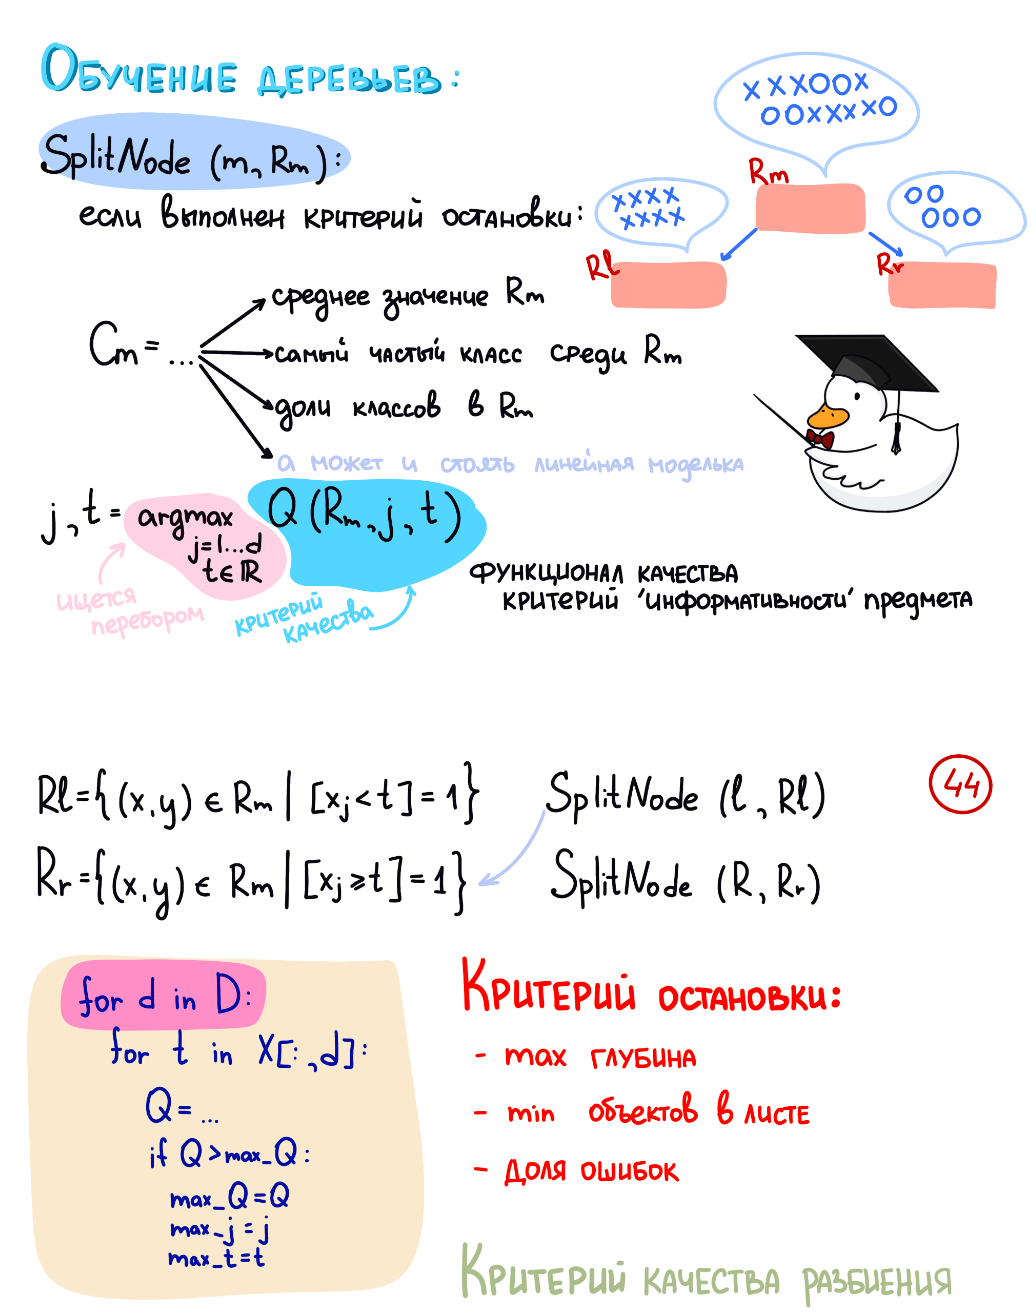

In [84]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """


    # Заметки : пороги меньше min(feature) и больше max(feature) не рассматриваются
    pairs = np.array(sorted(zip(feature_vector, target_vector)))
    feature_vector = pairs[:, 0]
    target_vector = pairs[:, 1]
    k = target_vector.shape[0]

    feature_vector, index = np.unique(feature_vector, return_index=True)
    n = feature_vector.shape[0]
    index = index[1:n] - 1
    pref = np.cumsum(target_vector)

    thresholds = (feature_vector[: n - 1] + feature_vector[1 : n + 1]) / 2
    positive = pref[k - 1]
    R_l = index + 1
    R_r = k - R_l
    c1_l = pref[index]
    c1_r = positive - c1_l
    c0_l = R_l - c1_l
    c0_r = R_r - c1_r
    ginis = (((c0_l * c0_l + c1_l * c1_l) / R_l + (c0_r * c0_r + c1_r * c1_r) / R_r) / k) - 1

    best = np.argmax(ginis)

    return thresholds, ginis, thresholds[best], ginis[best]


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        if np.all(sub_y == sub_y[0]):
            node["height"] = 0
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if ((self._max_depth is not None) and self._max_depth <= depth) or \
                ((self._cur_min_samples_split is not None) and self._cur_min_samples_split >= sub_y.shape[0]):
            node["height"] = 0
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            ratio = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                feature_vector = np.array(list(map(lambda x: ratio[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.min(feature_vector) == np.max(feature_vector):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, ratio.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["height"] = 0
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        left_X = sub_X[split]
        left_y = sub_y[split]
        right_X = sub_X[np.logical_not(split)]
        right_y = sub_y[np.logical_not(split)]
        if (self._cur_min_samples_leaf is not None) and \
                left_y.shape[0] < self._cur_min_samples_leaf and \
                right_y.shape[0] < self._cur_min_samples_leaf:
            node["height"] = 0
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = set(threshold_best)
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}

        self._fit_node(left_X, left_y, node["left_child"], depth + 1)
        self._fit_node(right_X, right_y, node["right_child"], depth + 1)
        node["height"] = max(node["left_child"]["height"], node["right_child"]["height"]) + 1

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        feature = node["feature_split"]
        if self._feature_types[feature] == "real":
            if x[feature] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[feature] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def get_params(self, deep):
        return {'feature_types': self._feature_types,
                'max_depth': self._max_depth,
                'min_samples_split': self._min_samples_split,
                'min_samples_leaf': self._min_samples_leaf}

    def fit(self, X, y):
        self._cur_min_samples_split = self._min_samples_split
        self._cur_min_samples_leaf = self._min_samples_leaf
        if isinstance(self._min_samples_split, float):
            self._cur_min_samples_split = np.ceil(self._min_samples_split * y.shape[0])
        if isinstance(self._min_samples_leaf, float):
            self._cur_min_samples_leaf = np.ceil(self._min_samples_leaf * y.shape[0])
        self._fit_node(X, y, self._tree, 0)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

    def get_depth(self):
        return self._tree["height"]

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [86]:
df = pd.read_csv('agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [87]:
X = df.drop('p', axis=1)
y = df['p']

In [88]:
le = LabelEncoder()

for column in X.columns:
  X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tr = DecisionTree(['categorical'] * X.shape[1])
tr.fit(np.array(X_train), np.array(y_train))
print('test accuracy:', accuracy_score(tr.predict(np.array(X_test)), y_test))

test accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder(sparse=False)

In [33]:
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')
mushrooms = pd.read_csv('agaricus-lepiota.data')

In [76]:
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [73]:
tic_tac_toe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [9]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0


In [11]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0


In [17]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [28]:
cars.loc[((cars['unacc'] == 'unacc') | (cars['unacc'] == 'acc')), 'unacc'] = 0
cars.loc[((cars['unacc'] == 'good') | (cars['unacc'] == 'vgood')), 'unacc'] = 1

In [29]:
nursery.loc[((nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')), 'recommend'] = 0
nursery.loc[((nursery['recommend'] == 'priority') | (nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior')), 'recommend'] = 1

In [35]:
X_mushrooms = mushrooms.drop('p', axis=1)
y_mushrooms = mushrooms['p']

le = LabelEncoder()

for column in X_mushrooms.columns:
  X_mushrooms[column] = le.fit_transform(X_mushrooms[column])

y_mushrooms = le.fit_transform(y_mushrooms)

X_tic = tic_tac_toe.drop('V10', axis=1)
y_tic = tic_tac_toe['V10']

for column in X_tic.columns:
  X_tic[column] = le.fit_transform(X_tic[column])

y_tic = le.fit_transform(y_tic)

X_cars = cars.drop('unacc', axis=1)
y_cars = cars['unacc']

for column in X_cars.columns:
  X_cars[column] = le.fit_transform(X_cars[column])

y_cars = le.fit_transform(y_cars)

X_nursery = nursery.drop('recommend', axis=1)
y_nursery = nursery['recommend']

for column in X_nursery.columns:
  X_nursery[column] = le.fit_transform(X_nursery[column])

y_nursery = le.fit_transform(y_nursery)

In [36]:
results = pd.DataFrame(columns=['real', 'categorical', 'real+ohe', 'DecisionTreeClassifier'])

In [37]:
tr = DecisionTree(['real'] * X_mushrooms.shape[1])
acc_mushrooms_1 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_mushrooms.shape[1])
acc_mushrooms_2 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_mushrooms_ohe = ohe.fit_transform(X_mushrooms)
tr = DecisionTree(['real'] * X_mushrooms_ohe.shape[1])
acc_mushrooms_3 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms_ohe), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_mushrooms_4 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['mushrooms'] = [
    acc_mushrooms_1,
    acc_mushrooms_2,
    acc_mushrooms_3,
    acc_mushrooms_4
]

In [38]:
tr = DecisionTree(['real'] * X_tic.shape[1])
acc_tic_1 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_tic.shape[1])
acc_tic_2 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_tic_ohe = ohe.fit_transform(X_tic)
tr = DecisionTree(['real'] * X_mushrooms_ohe.shape[1])
acc_tic_3 = np.mean(cross_val_score(tr, X = np.array(X_tic_ohe), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_tic_4 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['tic-tac-toe'] = [
    acc_tic_1,
    acc_tic_2,
    acc_tic_3,
    acc_tic_4
]

In [39]:
tr = DecisionTree(['real'] * X_cars.shape[1])
acc_cars_1 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_cars.shape[1])
acc_cars_2 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_cars_ohe = ohe.fit_transform(X_cars)
tr = DecisionTree(['real'] * X_cars_ohe.shape[1])
acc_cars_3 = np.mean(cross_val_score(tr, X = np.array(X_cars_ohe), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_cars_4 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['cars'] = [
    acc_cars_1,
    acc_cars_2,
    acc_cars_3,
    acc_cars_4
]

In [40]:
tr = DecisionTree(['real'] * X_nursery.shape[1])
acc_nursery_1 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_nursery.shape[1])
acc_nursery_2 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_nursery_ohe = ohe.fit_transform(X_nursery)
tr = DecisionTree(['real'] * X_nursery_ohe.shape[1])
acc_nursery_3 = np.mean(cross_val_score(tr, X = np.array(X_nursery_ohe), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_nursery_4 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['nursery'] = [
    acc_nursery_1,
    acc_nursery_2,
    acc_nursery_3,
    acc_nursery_4
]

In [72]:
results

,real,categorical,real+ohe,DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999631,0.999261
tic-tac-toe,0.467533,0.541458,0.544616,0.464441
cars,0.874882,0.747022,0.846471,0.917754
nursery,0.901157,0.910879,0.829552,0.902083


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?





Ответ: Результаты, полученные для датасетов mushrooms, cars и nursery, были достаточно хорошими во всех экспериментах, причем лучший результат был достигнут при использовании категориальных признаков. Для датасета tic-tac-toe результаты были менее удовлетворительными, что указывает на сложность решения данной задачи с использованием этих методов.

Компонента случайности была сведена к минимуму за счет использования среднего значения через кросс-валидацию. Однако использование OneHotEncoding привело к увеличению времени работы алгоритма, не дав при этом лучших результатов.

Среди датасетов mushrooms, cars и nursery наихудшие результаты были получены для датасета cars. Возможно, это связано с необычным распределением целевой переменной в этом датасете, что может затруднять его решение при использовании данного метода. Тем не менее, нужны дополнительные исследования для точного определения причин такого результата.